<a href="https://colab.research.google.com/github/nvj1d/ML/blob/main/tp1_clustring_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#the data:
array = {"column1":[5,4,1,0],"column2":[4,5,-2,-3]}

In [ ]:
#make a dataftame:
dataset = pd.DataFrame(array)
dataset

,column1,column2
0,5,4
1,4,5
2,1,-2
3,0,-3


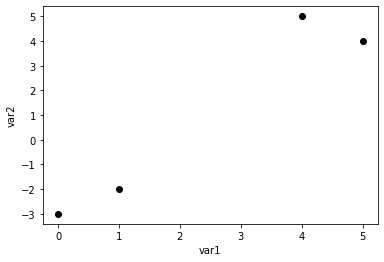

In [ ]:
#Visualise the data
plt.scatter(dataset['column1'],dataset['column2'],c='black')
plt.xlabel('var1')
plt.ylabel('var2')
plt.show()

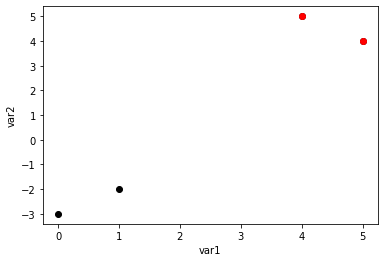

In [ ]:
#les centers:
K = 2 #the number of clusters
Centroids = pd.DataFrame({"column1":[5,4],"column2":[4,5]})
plt.scatter(dataset["column1"],dataset["column2"],c='black')
plt.scatter(Centroids["column1"],Centroids["column2"],c='red')
plt.xlabel('var1')
plt.ylabel('var2')
plt.show()

In [ ]:
X = dataset
diff = 1
j = 0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["column1"]-row_d["column1"])**2
            d2=(row_c["column2"]-row_d["column2"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["column2","column1"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['column2'] - Centroids['column2']).sum() + (Centroids_new['column1'] - Centroids['column1']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["column2","column1"]]

0.0


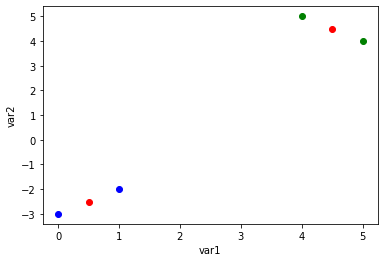

In [ ]:
color=['blue','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["column1"],data["column2"],c=color[k])
plt.scatter(Centroids["column1"],Centroids["column2"],c='red')
plt.xlabel('var1')
plt.ylabel('var2')
plt.show()

In [ ]:
#clustring using the Kmeans in sklearn:
Kmeans = KMeans(2)
Kmeans.fit(dataset)

KMeans(n_clusters=2)

In [ ]:
identified_clusters = Kmeans.fit_predict(dataset)
identified_clusters

array([0, 0, 1, 1], dtype=int32)

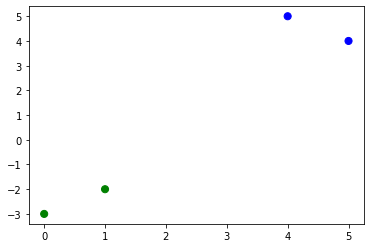

In [ ]:
color_map = np.array(["blue","green"])
plt.scatter(dataset["column1"],dataset["column2"],c = color_map[Kmeans.labels_], s = 50)

In [ ]:
# calculer l'inertie:
print("l'inertie est:",Kmeans.inertia_)

l'inertie est: 2.0
